# **Milestone 1**

### **Context:**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to ﬁnd footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very diﬀerent beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can inﬂuence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### **The objective:**

Come up with a pricing model that can eﬀectively predict the price of used cars and can help the business in devising proﬁtable strategies using diﬀerential pricing.

### **The key questions:**

- What are the features affecting the price of used cars?
- What kind of correlations are present within the data?

### **The problem formulation**:

- Generate a model to accurately forecast car price predictions.
- Extract insights from data to drive business decisions towards profitability.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

# **Milestone 1** 

### **Loading libraries**

In [168]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# To split the data into train and test sets
from sklearn.model_selection import train_test_split


# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Load the data**

In [169]:
data = pd.read_csv("used_cars.csv")
data_back = data.copy() # back up data

### **Understand the data by observing a few rows**

In [170]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [171]:
# View last 5 rows
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


There are 7253 rows and 13 columns

### **Check the data types and and missing values of each column** 

In [172]:
# Check the datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [173]:
# Check total number of missing values of each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**

- Missing values observed for 6 variables.
- New_price has the highest number of missng values.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [174]:
# Remove S.No. column from data
data.drop("S.No.", axis=1, inplace = True)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [175]:
# Explore basic summary statistics of numeric variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:**

- Price ranges from 44,000 to 16,000,000.
- No cars with models newer than year 2019 model.
- Maximum number of seats in a car is 10.
- No car with more than 6,500,000 driven kilometers.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [176]:
# Explore basic summary statistics of categorical variables
data.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second


In [177]:
data.isnull().sum()/data.isnull().sum().sum()*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.025783
Engine                0.593013
Power                 2.256027
Seats                 0.683254
New_price            80.533711
Price                15.908212
dtype: float64

In [178]:
data.duplicated().sum()

1

In [179]:
data.drop_duplicates(inplace=True)

In [180]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.000,53429.00,73000.0000,6500000.00
Mileage,7250.0,18.141738,4.562492,0.00,15.170,18.16,21.1000,33.54
Engine,7206.0,1616.590064,595.324779,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7077.0,112.764474,53.497297,34.20,75.000,94.00,138.1000,616.00
Seats,7199.0,5.280456,0.809327,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Number of unique observations in each category**

In [181]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: Name
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Location
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric 

#### **Observations and Insights: **

- Most commonly available car model is Mahindra XUV500 W8 2WD.
- Mumbai has the higest number of cars available.
- Diesel is the most common fuel type.
- Manual cars are more commonly available than automatic cars.
- Much higher number of new cars available as compared to available used cars.

**Check Kilometers_Driven extreme values**

In [182]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: **

- The extreme value for Kilometers_Driven appears to be an outlier since only 1 car shows this value.

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [183]:
# Removing the 'row' at index 2328 from the data
data.drop(2328, axis=0, inplace=True)
    
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7251.000000,7251.000000,7249.000000,7205.000000,7076.000000,7198.000000,1006.000000,6018.000000
mean,2013.365329,57811.654255,18.142038,1616.399028,112.743949,5.280495,22.779692,9.470243
std,3.254350,37502.061260,4.562735,595.145170,53.473203,0.809376,27.759344,11.165926
min,1996.000000,171.000000,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,34000.000000,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,53416.000000,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,73000.000000,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Check Mileage extreme values**

In [184]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [185]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=30):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default 30)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=figsize
    )  # Creating the 2 subplots
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')  # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.histplot(feature, ax=ax_hist2, bins=bins, kde=False)  # For histogram
    
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')  # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

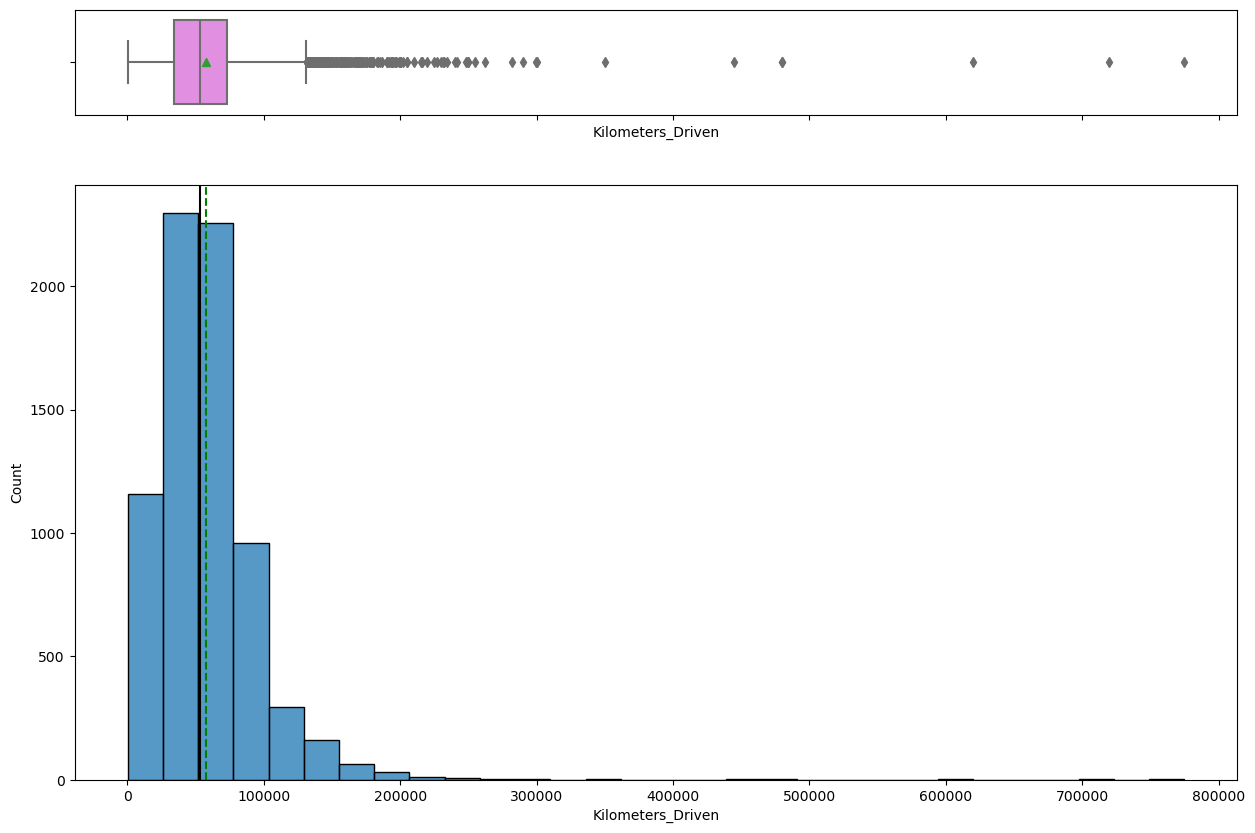

In [186]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

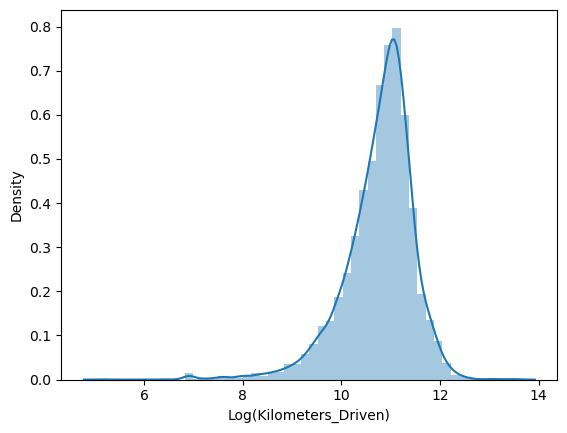

In [187]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**

- The distribution is right skewed showing that some cars have higher than average kilometers driven.

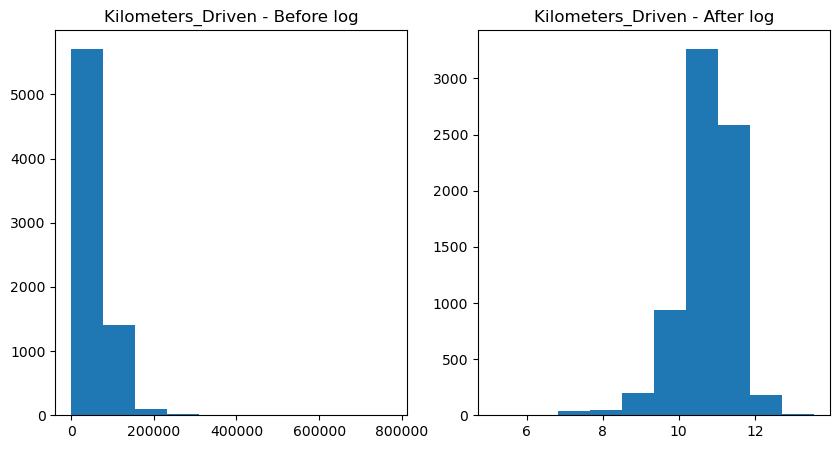

In [188]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

#plot log transformation of Kilometers_Driven
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Kilometers_Driven - Before log')
plt.hist(data['Kilometers_Driven'])
plt.subplot(1, 2, 2)
plt.title('Kilometers_Driven - After log')
plt.hist(np.log(data['Kilometers_Driven']))
plt.show()

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

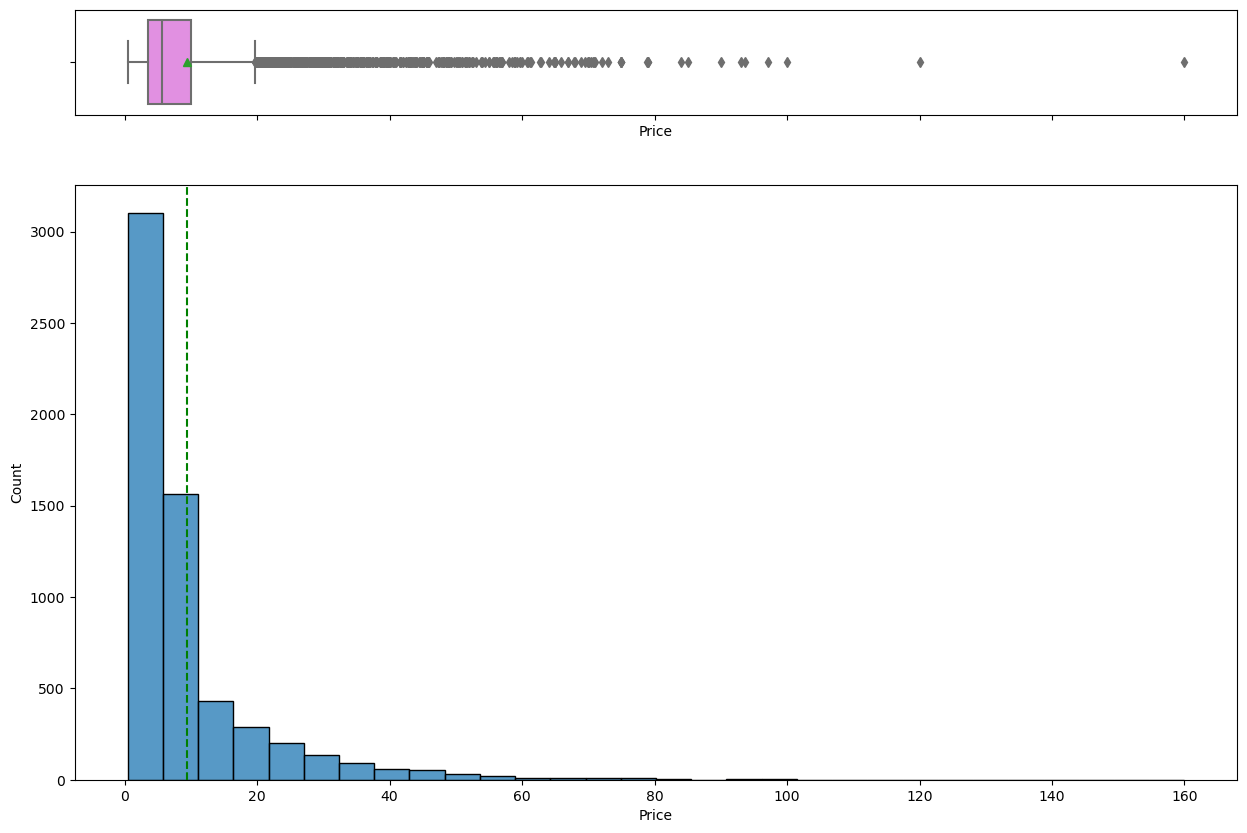

In [189]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

<Axes: xlabel='Log(Price)', ylabel='Density'>

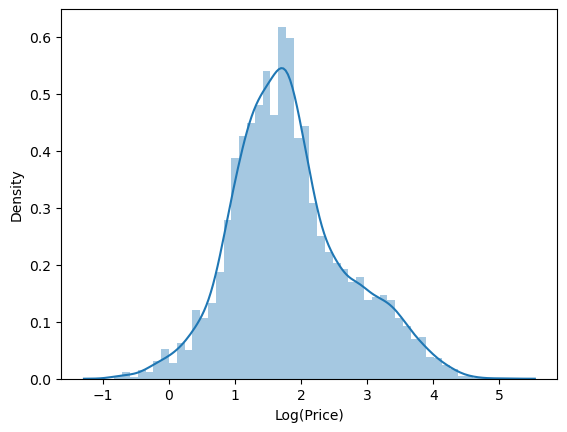

In [190]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)")

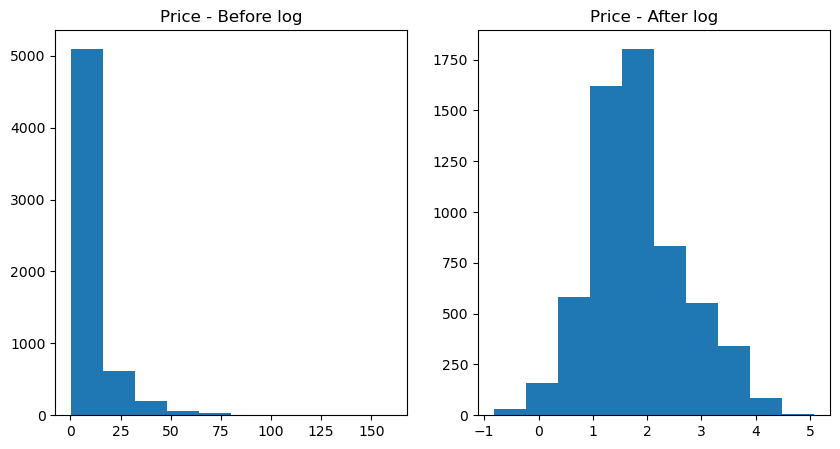

In [191]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#plot log transformation of Price
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Price - Before log')
plt.hist(data['Price'])
plt.subplot(1, 2, 2)
plt.title('Price - After log')
plt.hist(np.log(data['Price']))
plt.show()

**Observation:**
- Log transformation has helped normalize the distribution of price.

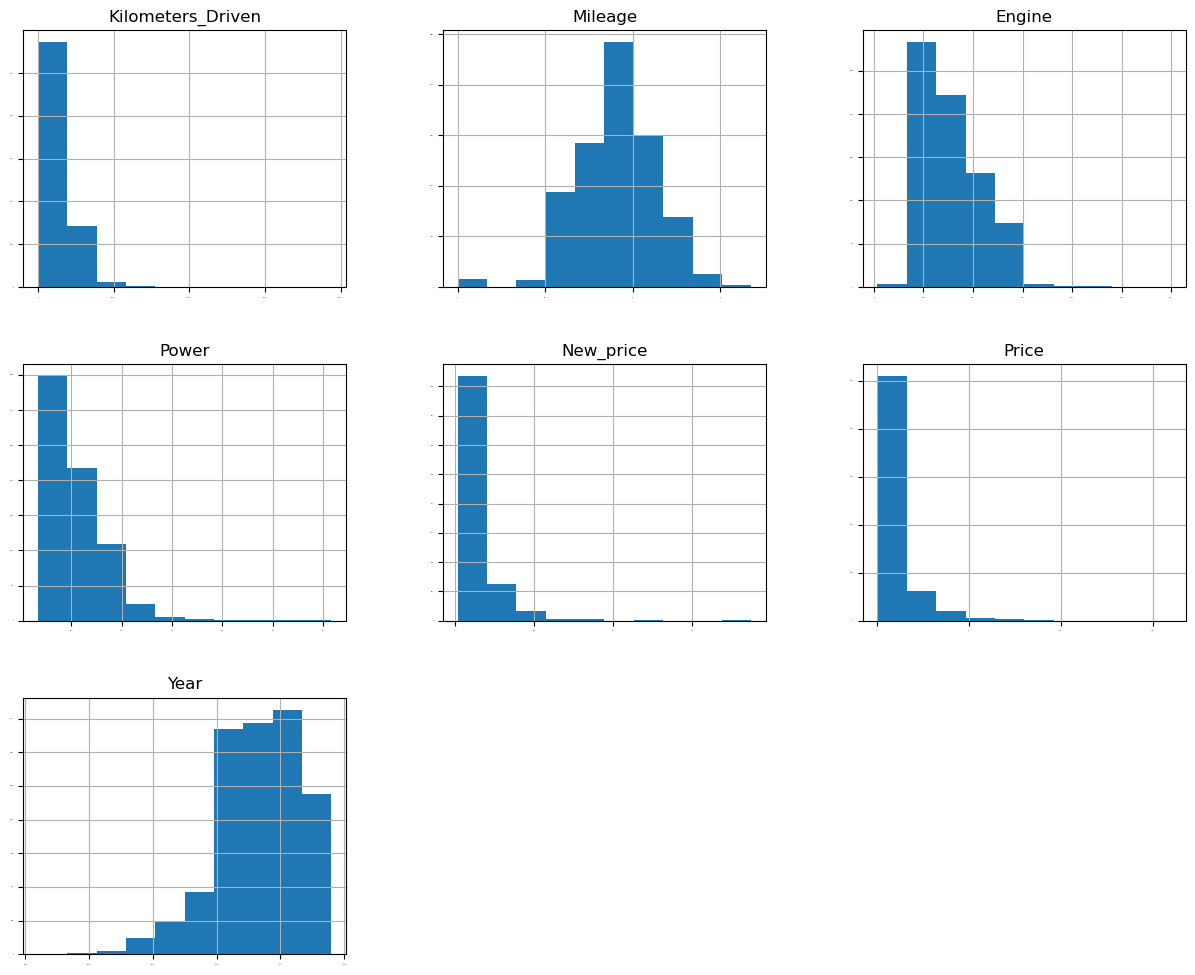

In [192]:
# histogram plots of numerical features

data_List1 = data[['Kilometers_Driven', 'Mileage','Engine','Power','New_price','Price', 'Year']]

data_List1.hist(sharex=False, sharey=False, layout=(3,3), xlabelsize=1, ylabelsize=1, figsize =(15,12))
plt.show()

**Observations and Insights for all the plots:**

- Outliers can be observed in Kilometers_Driven, Mileage, Engine, Power, New_price, and Price.
- Kilometers_Driven, New_price, and Price have significantly higher number of outliers compared to Mileage, Engine, and Power.

**Create a new column 'CarAge'**

In [193]:
import datetime
now = datetime.datetime.now()
now.year
data['CarAge']= now.year-data.Year

In [194]:
data.CarAge.value_counts().sort_index(ascending=True)

CarAge
5     119
6     361
7     708
8     886
9     929
10    925
11    791
12    690
13    579
14    406
15    252
16    207
17    148
18     89
19     68
20     35
21     20
22     18
23      8
24      5
25      2
26      4
28      1
Name: count, dtype: int64

In [195]:
data["CarAge"] = data["Year"]

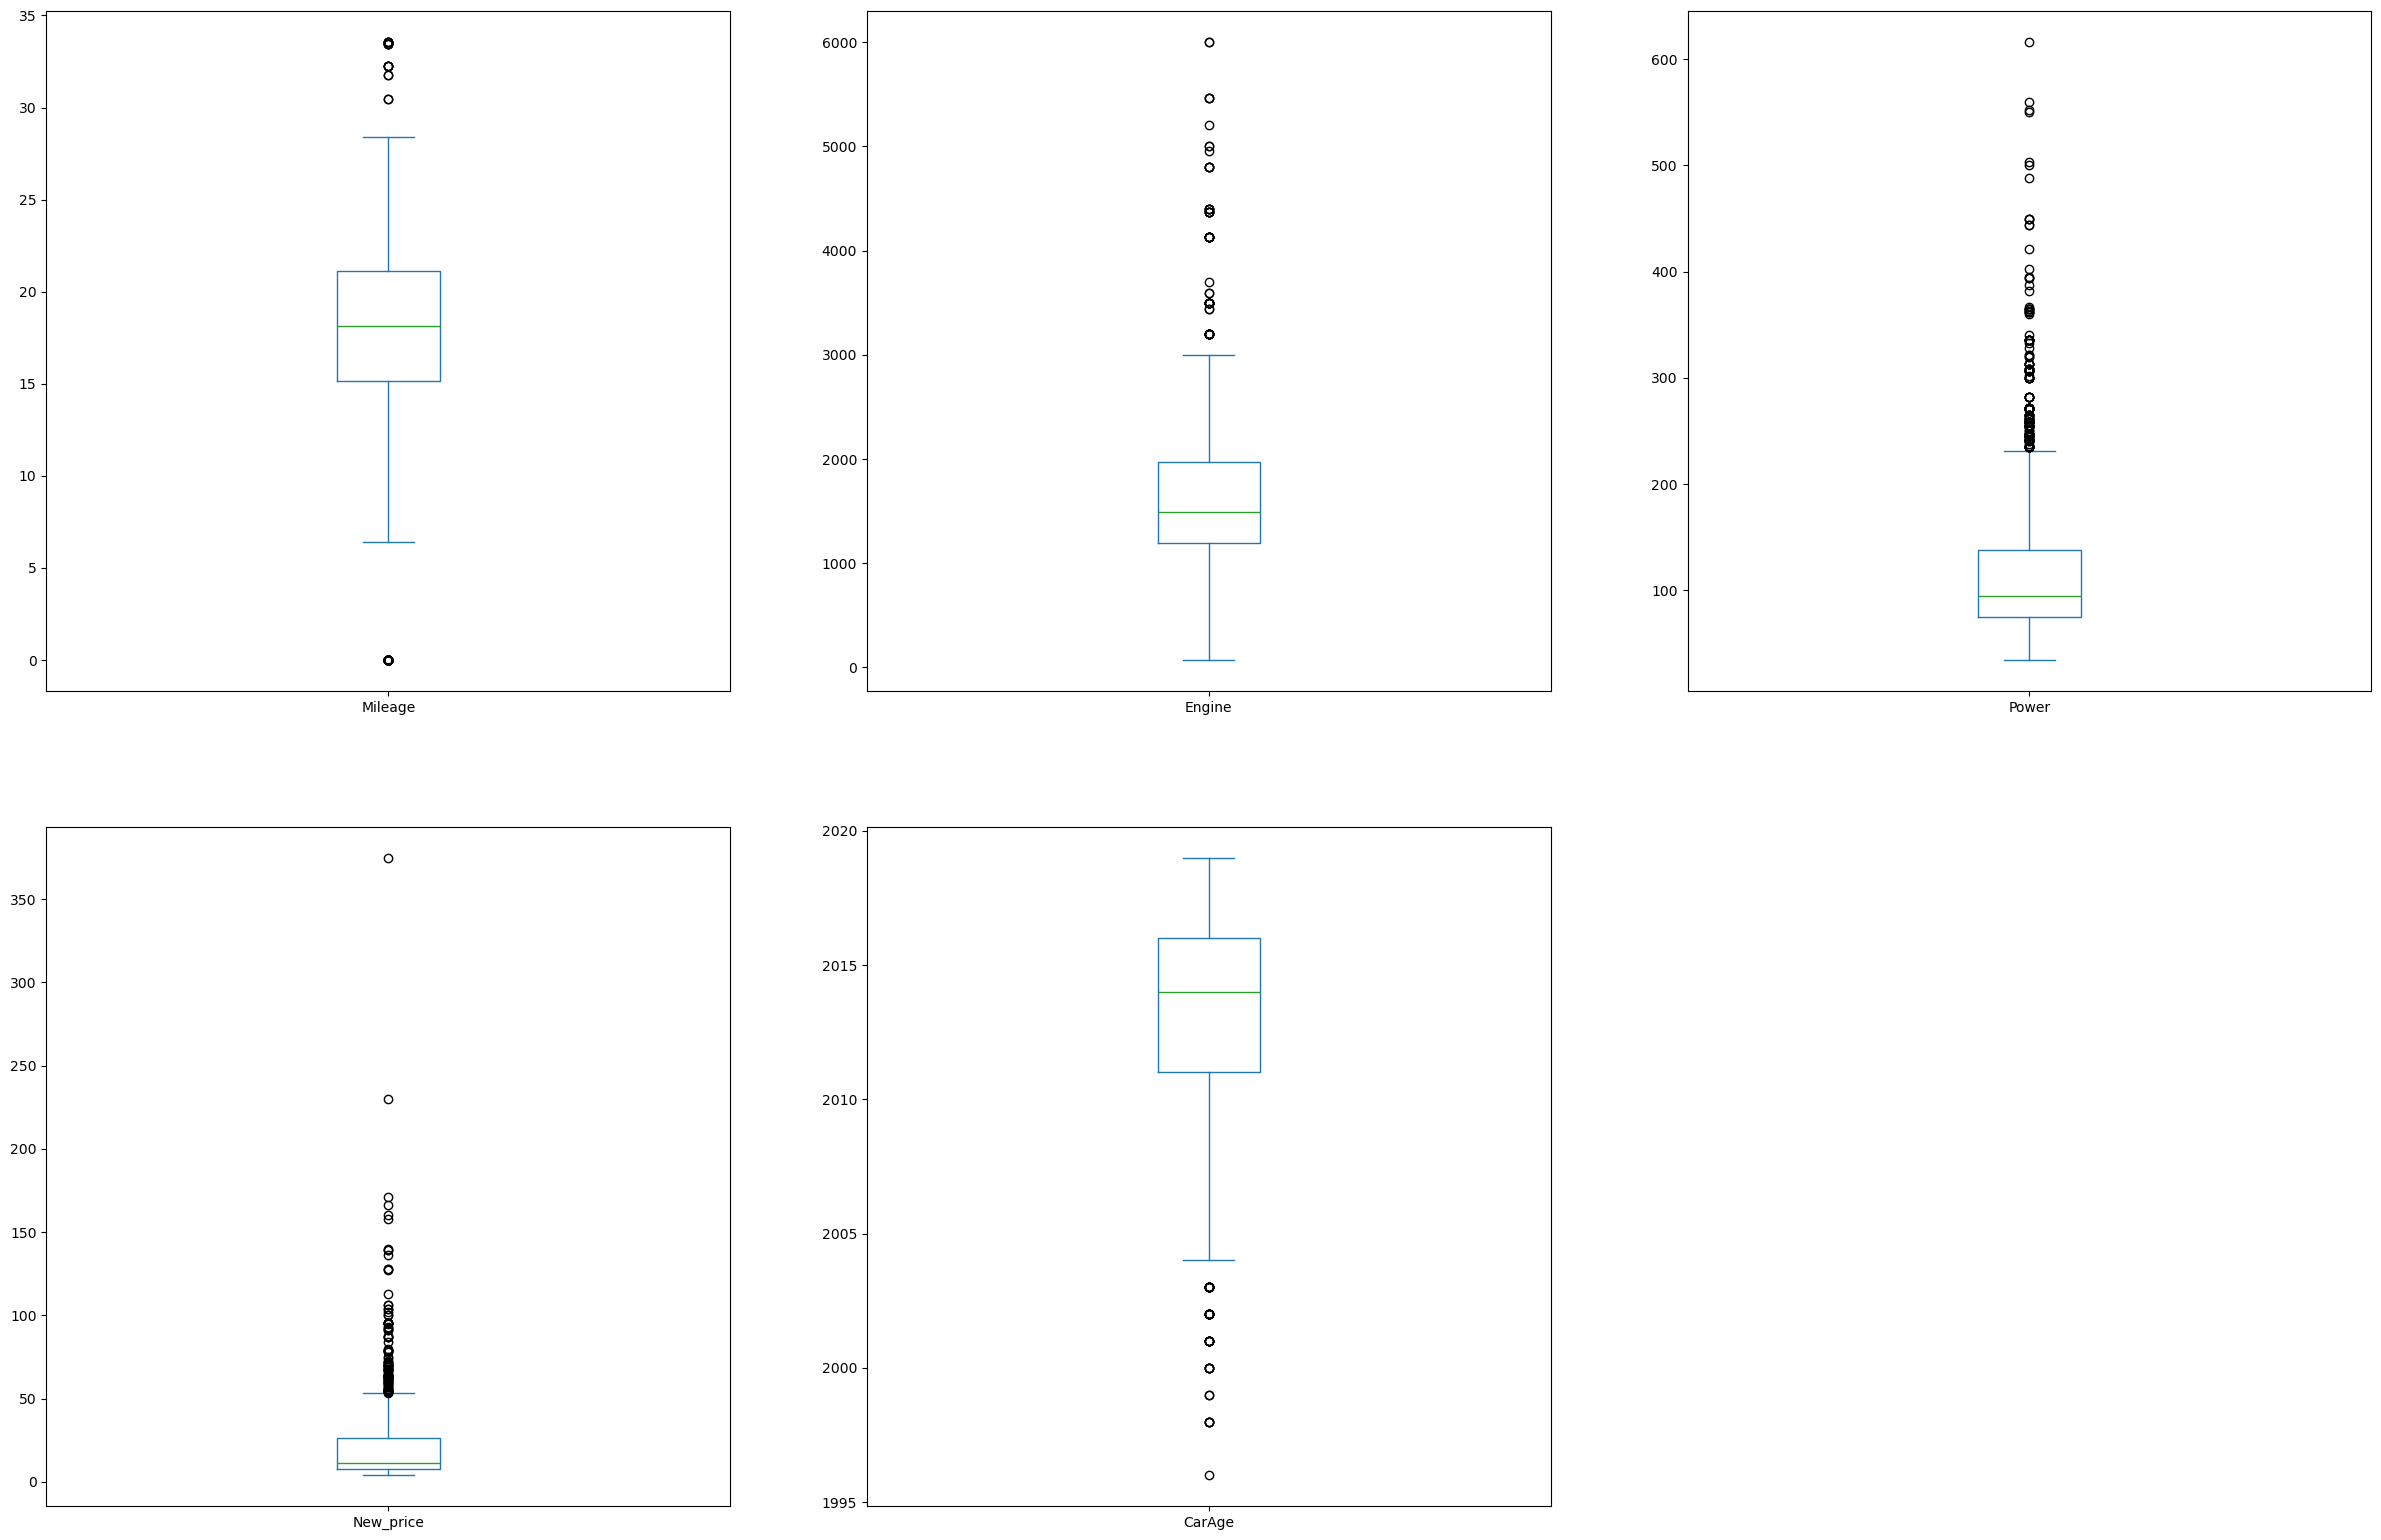

In [196]:
# boxplots of numerical features

data_List1 = data[['Mileage','Engine','Power','New_price', 'CarAge']]

data_List1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

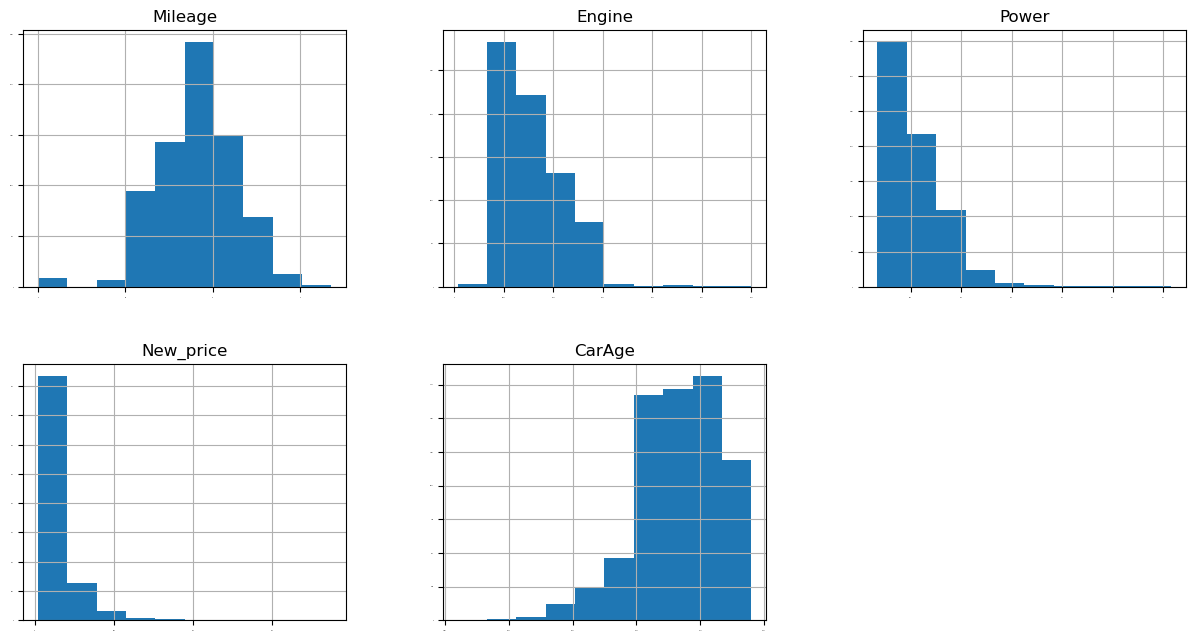

In [197]:
data_List1 = data[['Mileage','Engine','Power','New_price', 'CarAge']]

data_List1.hist(sharex=False, sharey=False, layout=(3,3), xlabelsize=1, ylabelsize=1, figsize =(15,12))
plt.show()

## **2. Univariate analysis - Categorical Data**

In [198]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    """
    Plot bar plot with percentage annotations for categorical data.
    
    z: Column name of the categorical feature.
    """
    
    total = len(data[z])  # Length of the column
    
    plt.figure(figsize=(15, 5))
    
    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot
        ax.annotate(percentage, (x, y), size=12)  # Annotate the percentage 
    
    plt.show()  # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

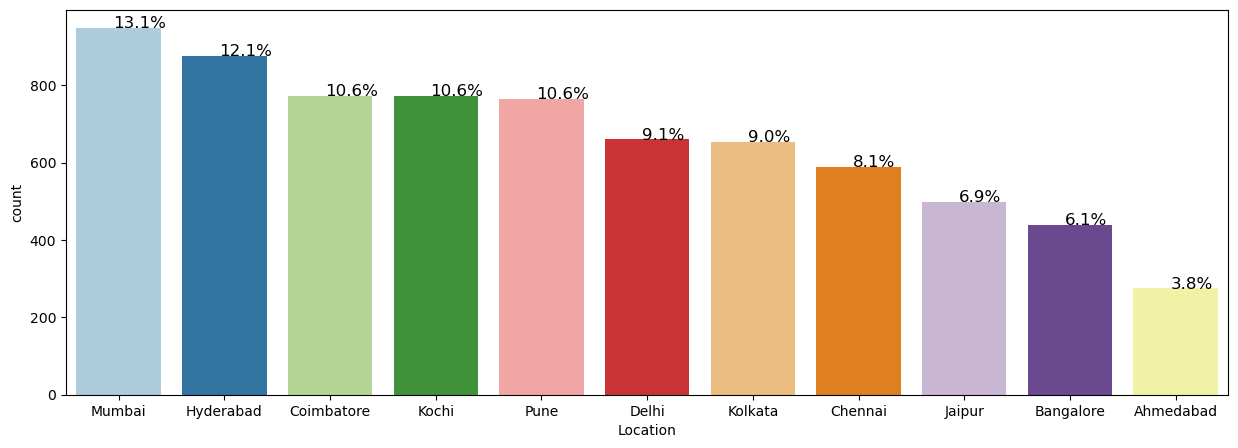

In [199]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

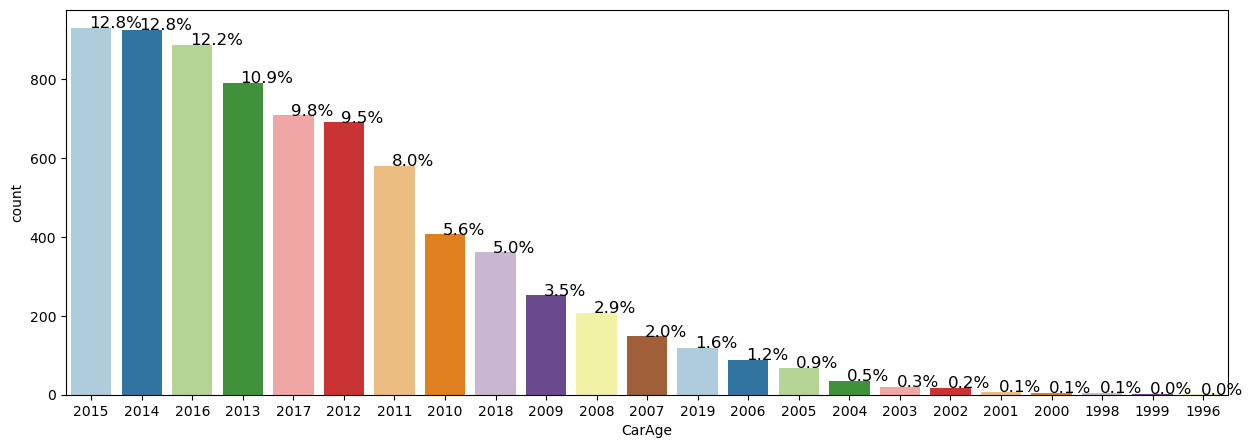

In [200]:
# Bar Plot for 'CarAge' 
# Year transformed into numeric variable CarAge
perc_on_bar('CarAge')

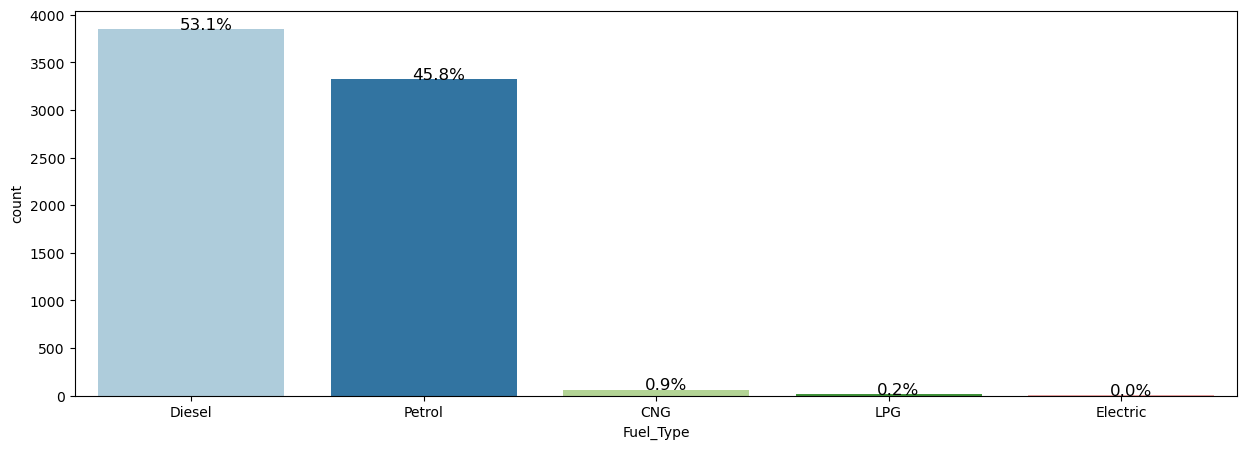

In [201]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

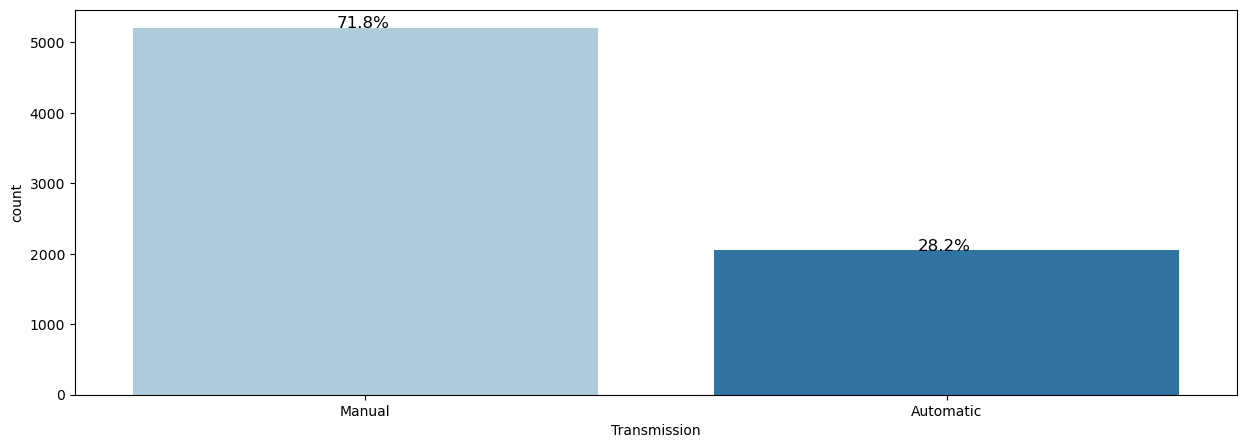

In [202]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

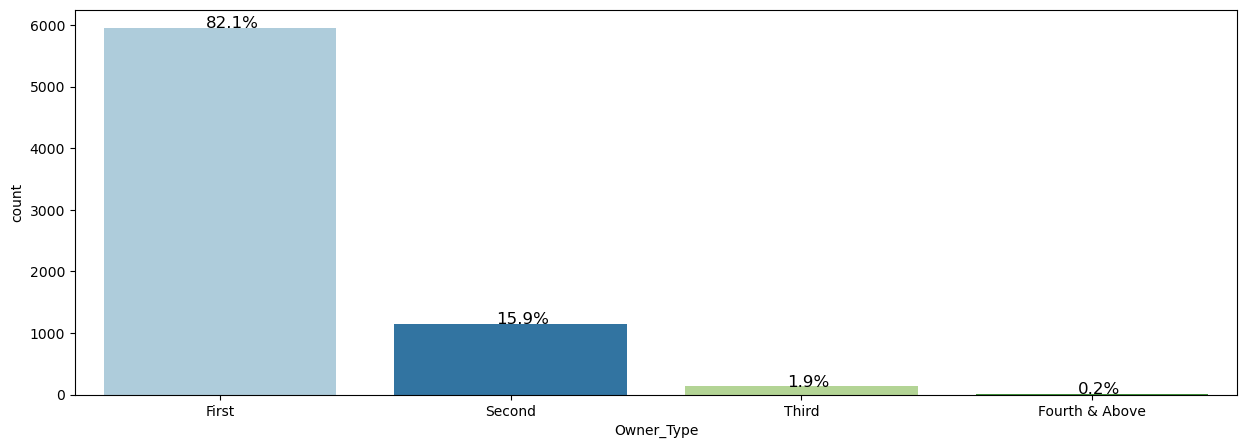

In [203]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**

- Cities with most owned cars is Mumbai and least owned cars found in Ahmedabad. It's likely that more urban areas have a higher rate.
- Newer car models are more common than older ones with a steady upward trend towards newer models.
- Majority of cars run on Diesel or Petrol for Fuel, with less than 1% cars using CNG and LPF, and 0% Electric. Shows that there's a higher demand for Diesel and Petron run cars with Diesel being slightly more popular.
- Most cars are of manual transmission with less than 30% being automatic showing that manual cars have a higher market.
- Most of the owners are first owners and less than 18% having used cars. It appears that cars are less commonly purchased with increasing number of past owners.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<Axes: xlabel='price_log'>

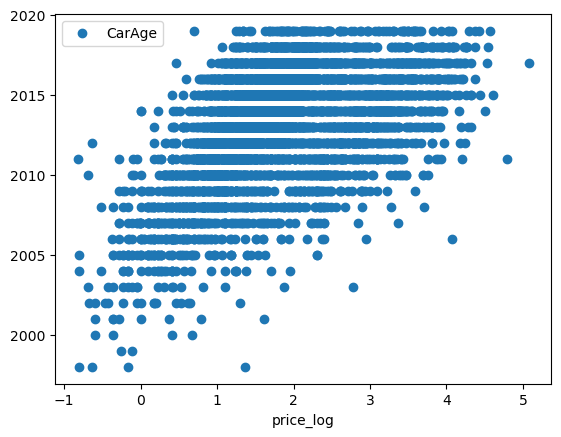

In [204]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'CarAge', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

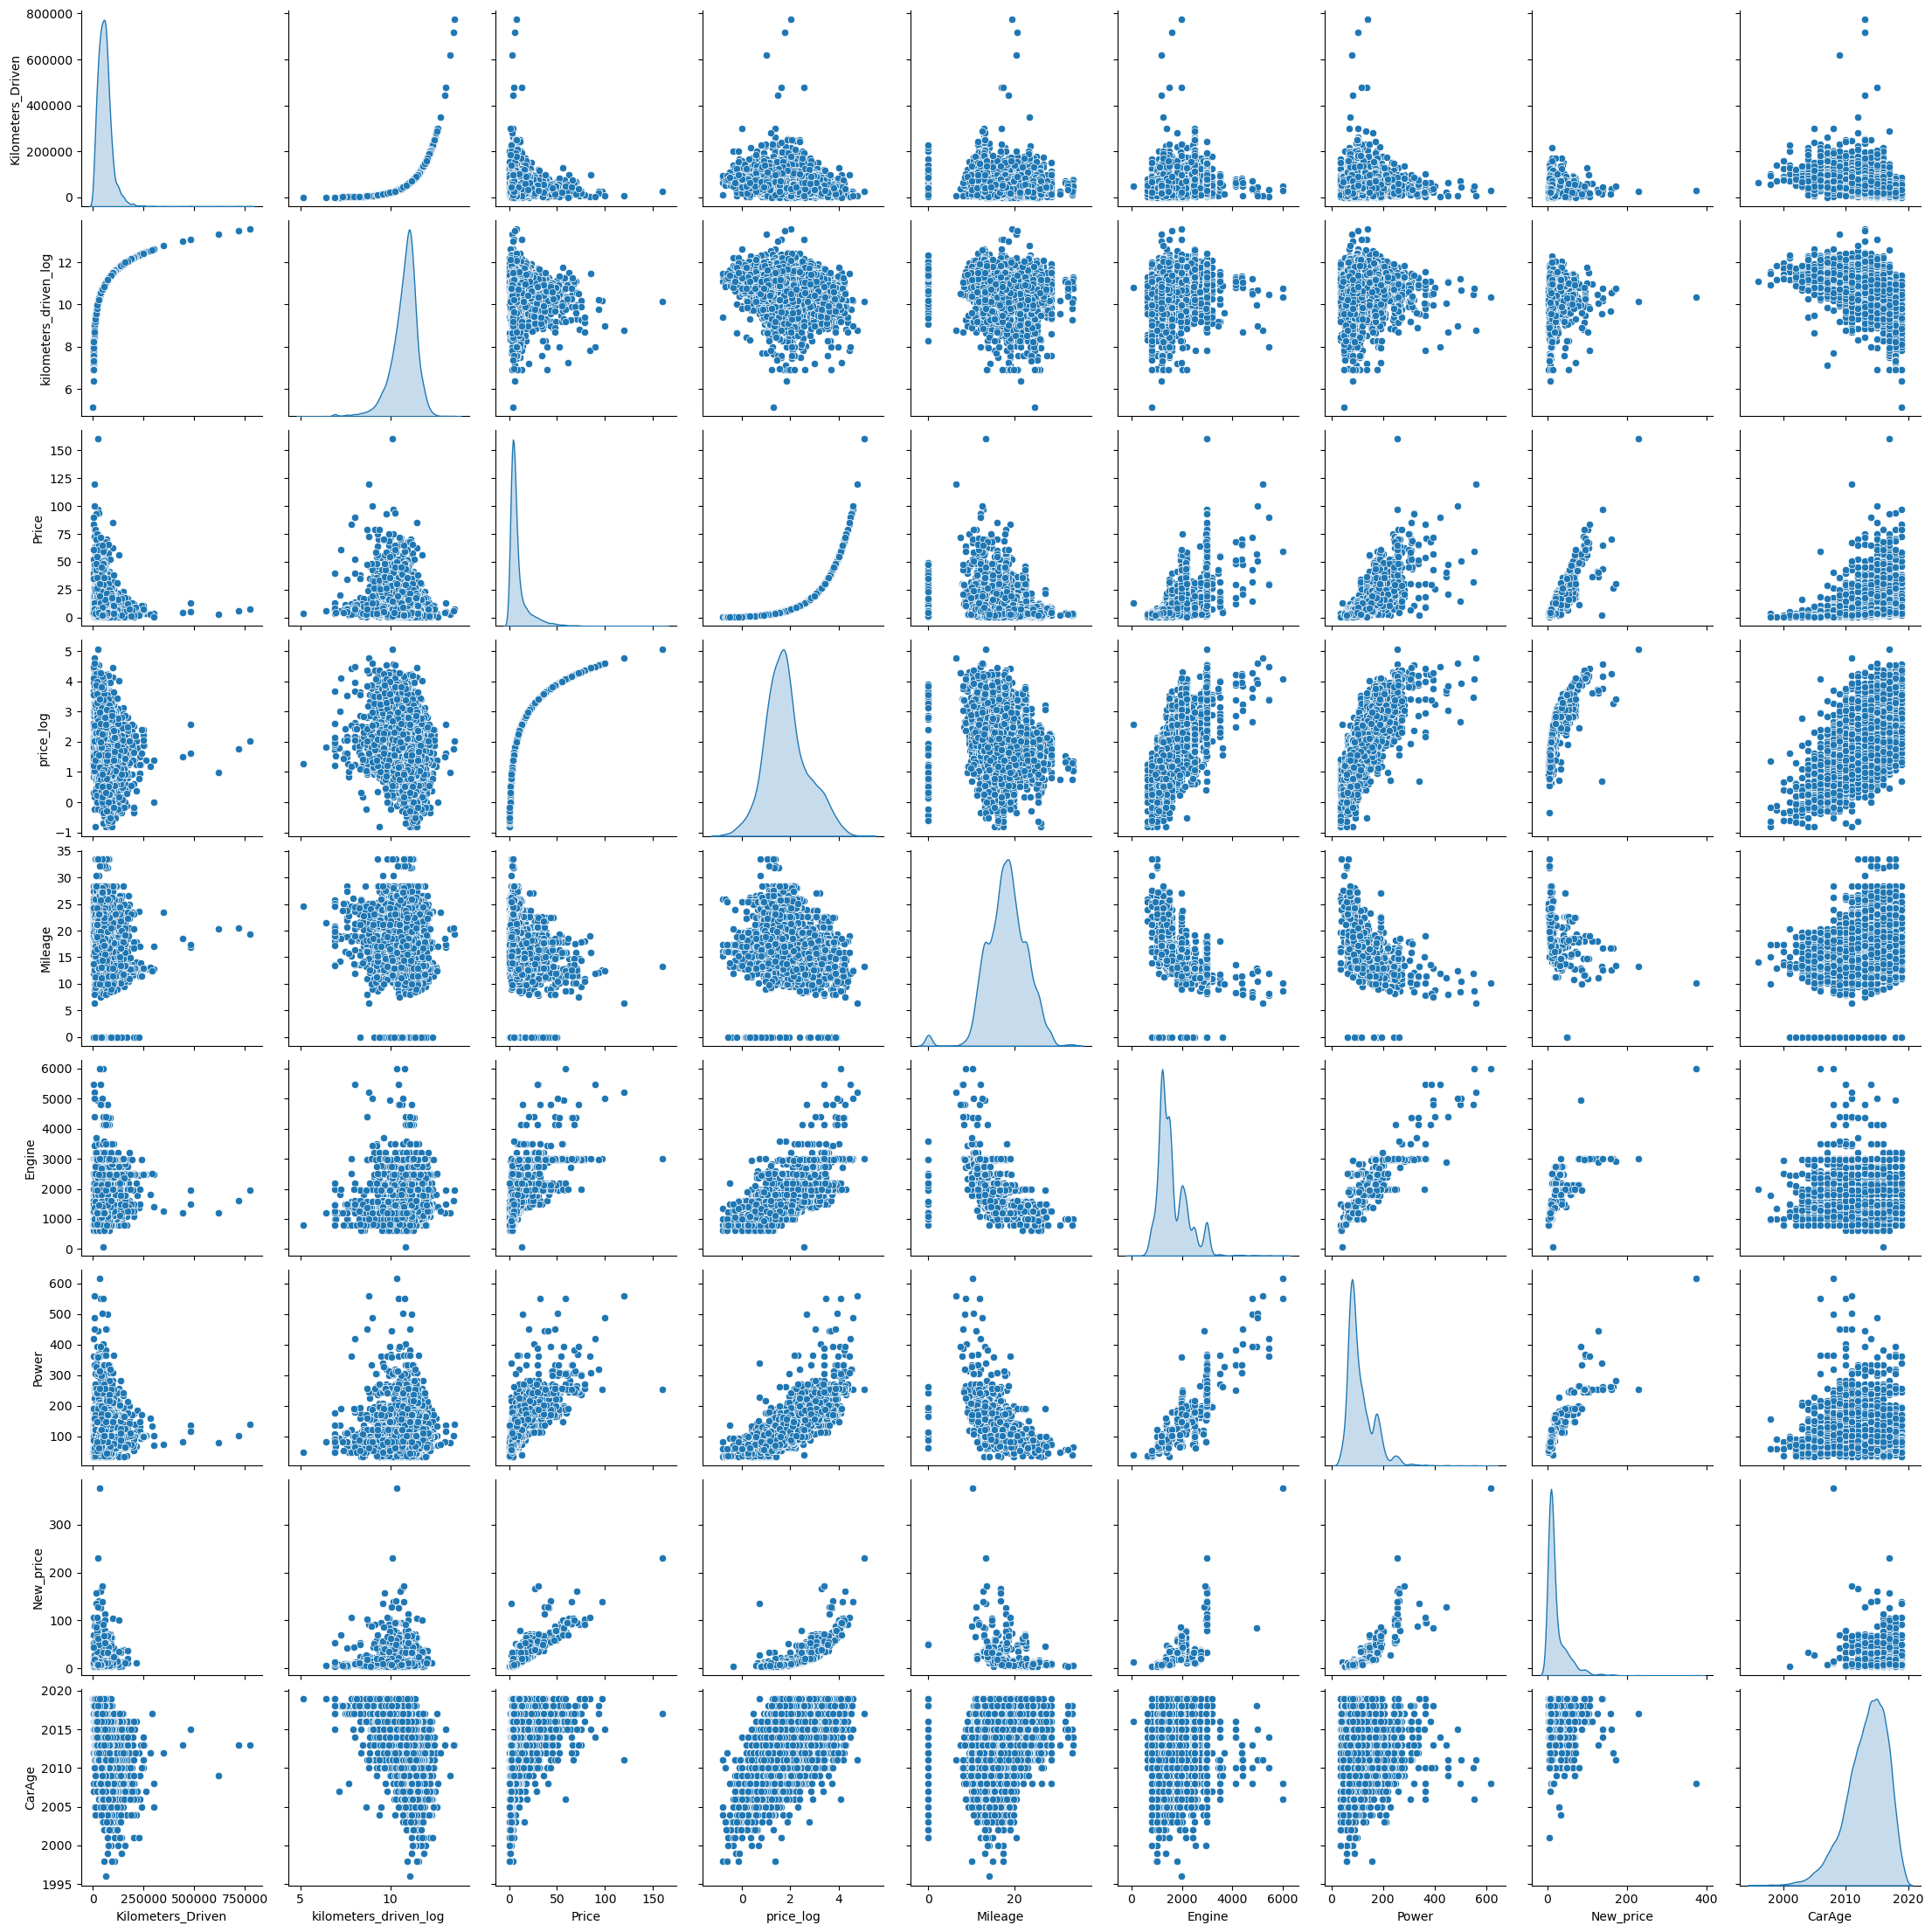

In [205]:
# pairplot to compare distributions of different variables and their relationships
data1 = data[['Kilometers_Driven', 'kilometers_driven_log', 'Price', 'price_log', 'Mileage','Engine','Power','New_price', 'CarAge']]
sns.pairplot(data=data1, diag_kind='kde')

**Observations and Insights from all plots:**

- New_price and Price display a positive correlation.
- Mileage shows negative correlation with used car price.
- Power and Engine are positively correlated with used car price.
- Power and Engine are positively correlated with each other. Engines with higher displacement volume capacity will generally have stronger power as well.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

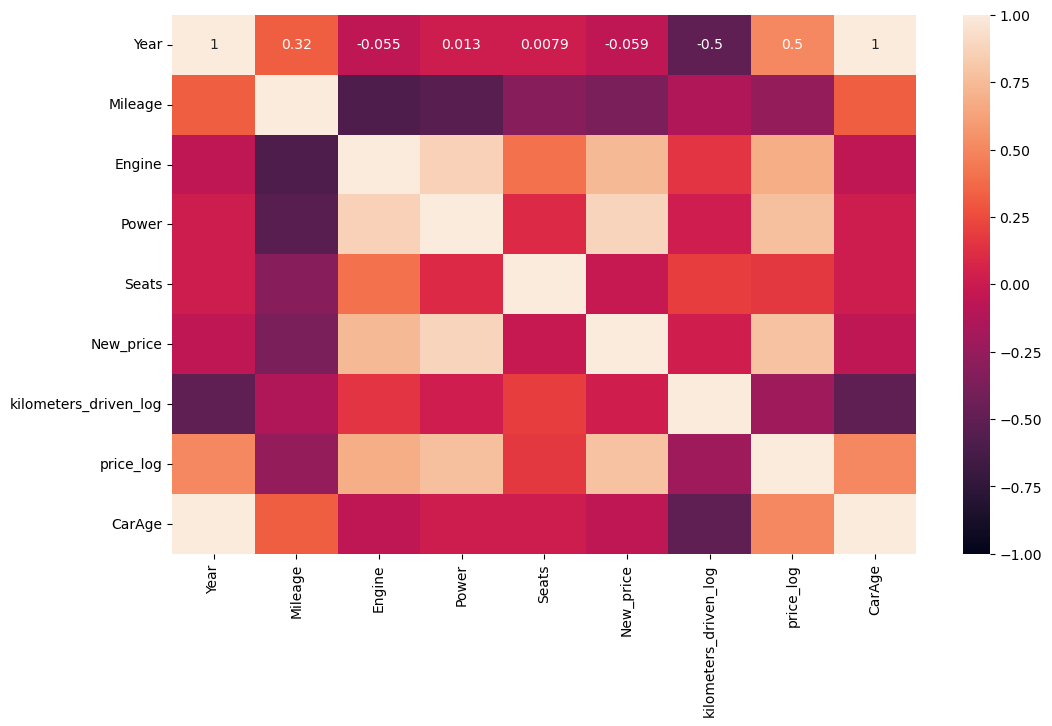

In [206]:
# Include log-transformed values and drop the original skewed data columns
# We also exclude non-numeric columns like 'Name' and 'Location'

# List of columns to drop
columns_to_drop = ['Kilometers_Driven', 'Price', 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(columns_to_drop, axis=1).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observations and Insights:**

- Strong Positive Correlation:

    - price_log and New_price indicate that higher new car prices correlate with higher used car prices.
    - Power and Engine show a strong correlation, as larger engines generally produce more power.

- Moderate Positive Correlation:

    - price_log and Engine suggest that cars with larger engines tend to have higher used car prices.
    - price_log and Power indicate that cars with higher horsepower tend to have higher prices.
    - kilometers_driven_log and CarAge suggest older cars typically have higher mileage.

- Negative Correlation with Price:

    - CarAge and price_log show that older cars tend to be cheaper.
    - kilometers_driven_log and price_log indicate cars with higher mileage are generally cheaper.

- Weak Correlation:

    - Mileage has a weak correlation with other features, suggesting it may not be a strong predictor of car prices in this dataset.

### **3. Box plot**

In [207]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['price_log']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['price_log'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

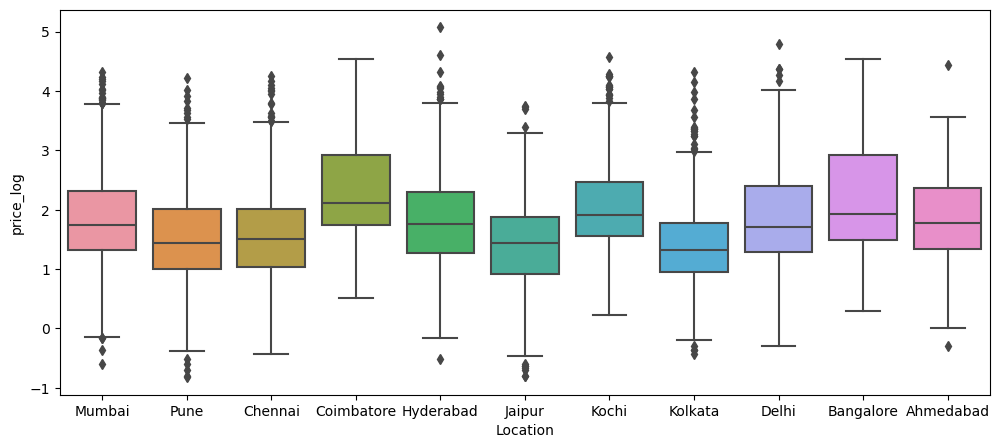

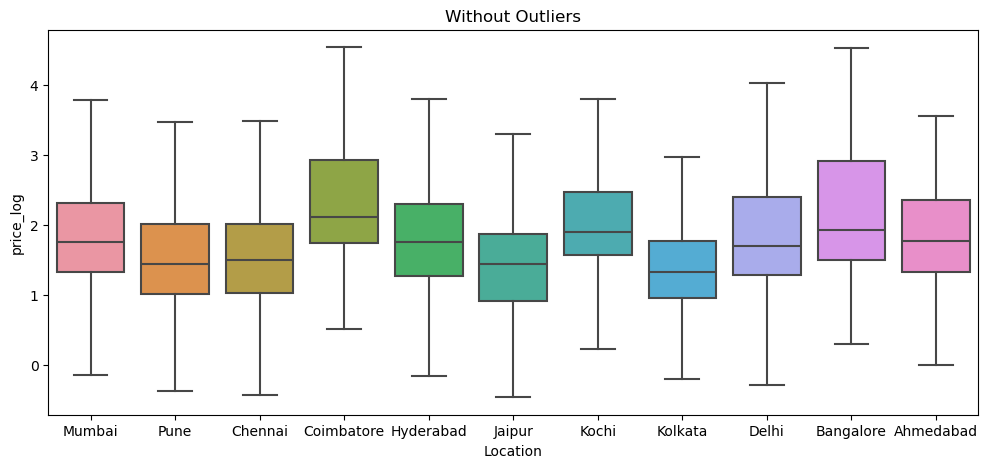

In [208]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

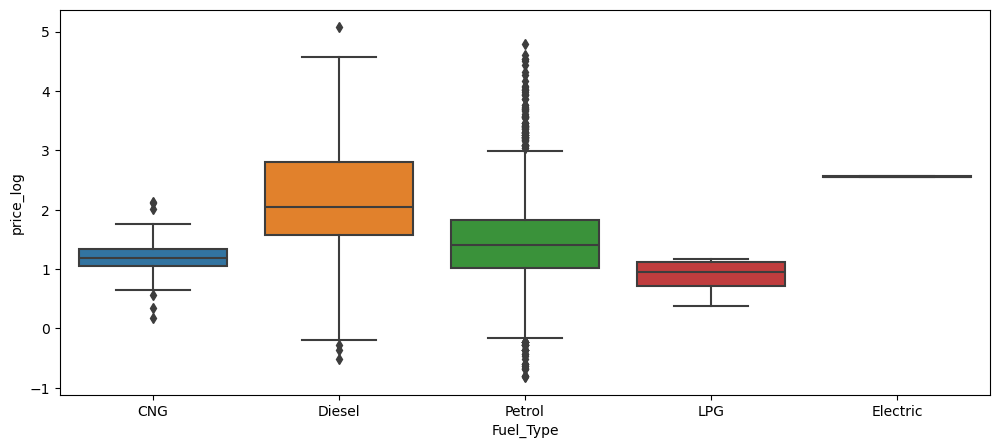

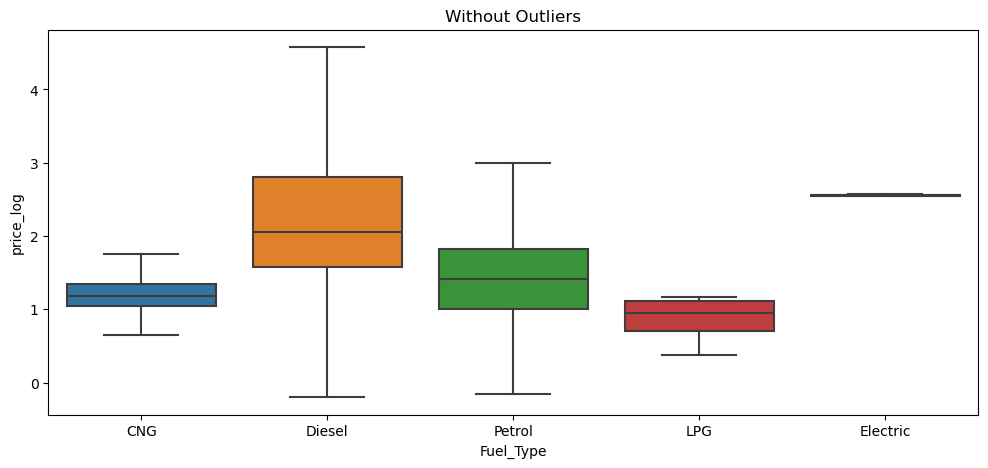

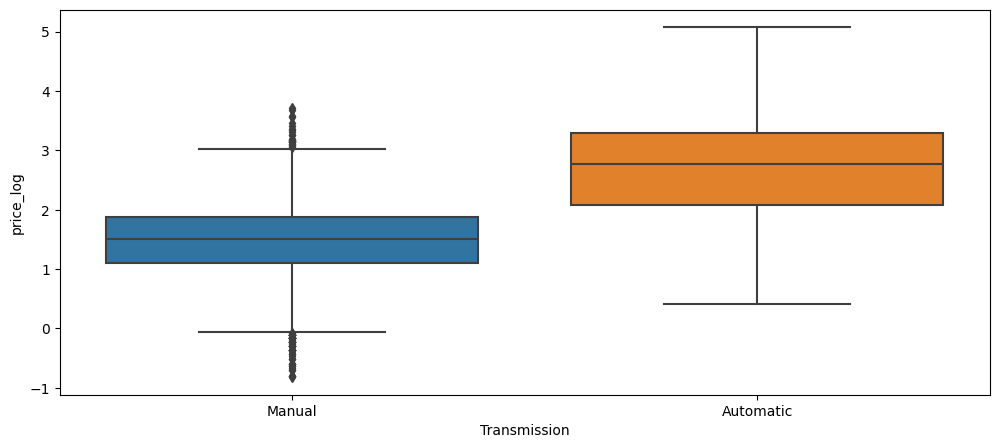

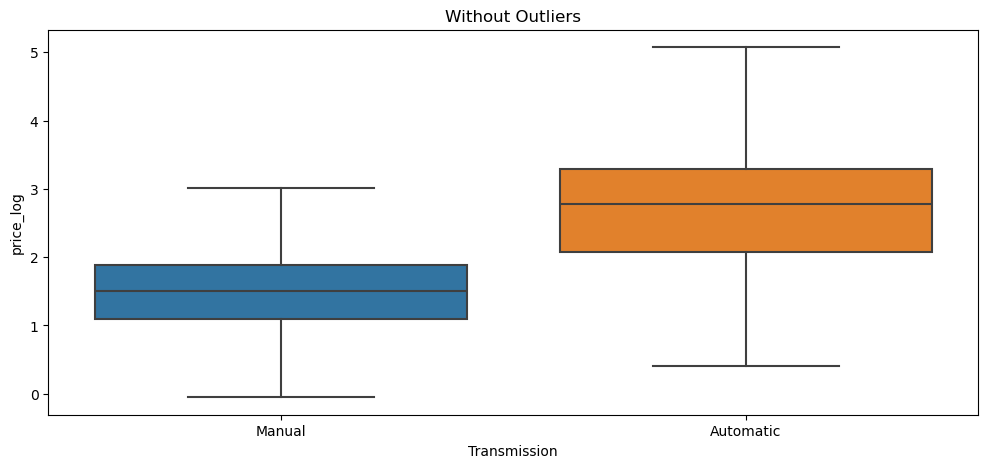

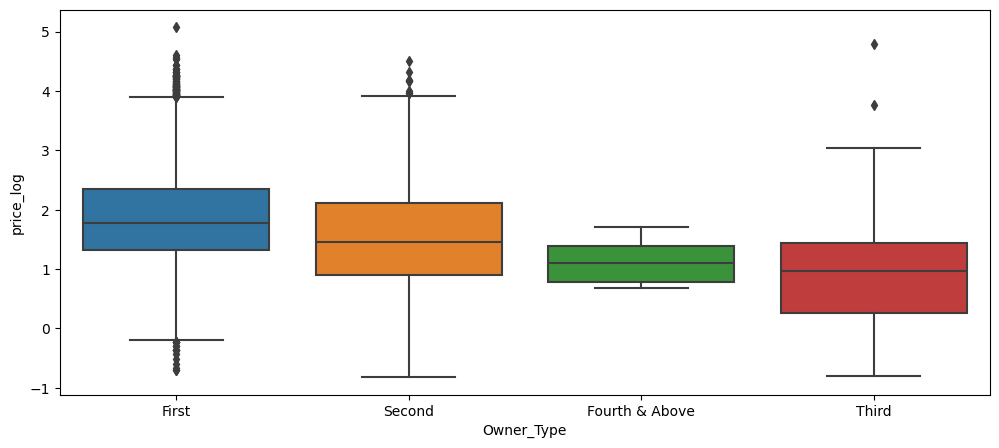

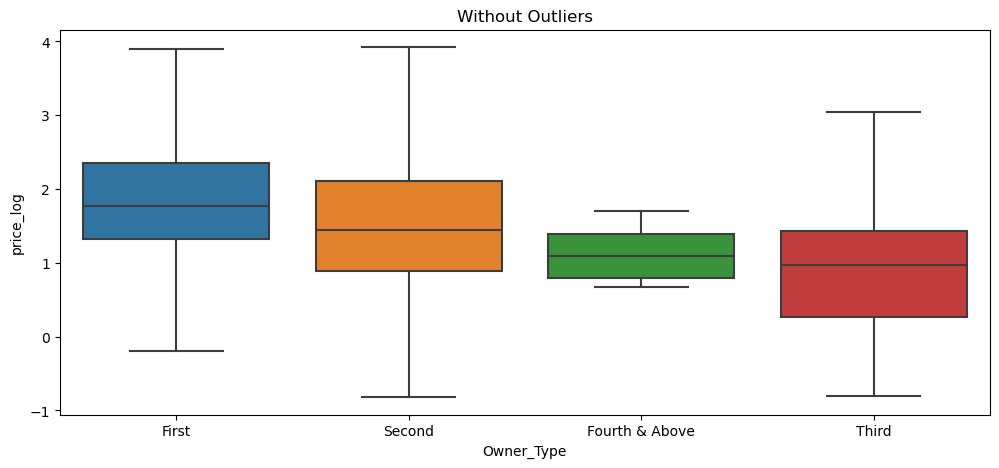

In [209]:
# boxplots between price and categorical features

boxplot(data['Fuel_Type'])
plt.show()

boxplot(data['Transmission'])
plt.show()

boxplot(data['Owner_Type'])
plt.show()

**Observations and Insights for all plots:**

**Price by Location:**

- With Outliers:
    - Coimbatore, Bangalore, and Hyderabad have higher median used car prices.
    - Ahmedabad, Pune, and Chennai have relatively lower median used car prices.

- Without Outliers:
    - Removing outliers shows a similar trend but with less variation in prices, making the differences in median prices more apparent.

**Price by Fuel Type:**

- With Outliers:
    - Diesel cars generally have higher median prices compared to Petrol and CNG.
    - LPG cars have the lowest median prices.
    - Electric cars have limited data but show higher prices.

- Without Outliers:
    - Diesel cars still show higher median prices, but the price range is more consistent.
    - The trend for Petrol and CNG remains similar.

**Price by Transmission:**

- With Outliers:
    - Automatic cars have higher median prices compared to Manual cars.

- Without Outliers:
    - The trend remains the same, with Automatic cars having higher median prices but reduced price range.

**Price by Owner Type:**

- With Outliers:
    - First-owner cars have higher median prices compared to second and third owners.
    - Cars with "Fourth & Above" ownership have the lowest median prices.

- Without Outliers:
    - The trend remains the same, with the hierarchy of prices being consistent across ownership types, but with reduced variation.

### **Feature Engineering**

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

In [210]:
# separate Brand name from Name

data['Brand'] = data['Name'].str.split(' ').str[0]

data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [211]:
# Brand names 'Isuzu' and 'ISUZU' are the same Brand name so should be entered the same way.

# Correct Brand name

col=['ISUZU','Isuzu']

data[data.Brand.isin(col)].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,CarAge,Brand,Model
2900,Isuzu MUX 4WD,Jaipur,2017,34429,Diesel,Automatic,First,13.80,2999.0,174.57,7.0,33.68,20.00,10.446655,2.995732,2017,Isuzu,MUX4WD
3624,ISUZU D-MAX V-Cross 4X4,Coimbatore,2018,20422,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,16.09,9.924368,2.778198,2018,ISUZU,D-MAXV-Cross
5979,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,25000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,8.00,10.126631,2.079442,2017,ISUZU,D-MAXV-Cross
6470,Isuzu MU 7 4x2 HIPACK,Kolkata,2016,45000,Diesel,Manual,First,12.08,2999.0,161.00,7.0,NaN,NaN,10.714418,NaN,2016,Isuzu,MU7
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN,12.577636,NaN,2017,ISUZU,D-MAXV-Cross


In [212]:
# changing Brand name

data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [213]:
# check unique brand names again

data.Brand.nunique()

32

In [214]:
data.groupby(data.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             742
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [215]:
data['Brand'] = data['Brand'].str.upper()

data.groupby(['Brand'])['Price'].agg({'median','mean','max'}).sort_values(by='max', ascending = False)

,median,max,mean
Brand,,,
LAND,35.000,160.00,39.259500
LAMBORGHINI,120.000,120.00,120.000000
JAGUAR,31.900,100.00,37.632250
BMW,21.000,93.67,25.093684
MERCEDES-BENZ,24.000,90.00,26.809874
PORSCHE,47.020,75.00,48.348333
AUDI,23.500,72.94,25.537712
BENTLEY,59.000,59.00,59.000000
FORD,5.345,56.80,6.889400


In [216]:
data['Brand'].value_counts().sort_index(ascending=True)

Brand
AMBASSADOR          1
AUDI              285
BENTLEY             2
BMW               311
CHEVROLET         151
DATSUN             17
FIAT               38
FORCE               3
FORD              351
HINDUSTAN           1
HONDA             742
HYUNDAI          1340
ISUZU               5
JAGUAR             48
JEEP               19
LAMBORGHINI         1
LAND               67
MAHINDRA          331
MARUTI           1444
MERCEDES-BENZ     380
MINI               31
MITSUBISHI         36
NISSAN            117
OPELCORSA           1
PORSCHE            19
RENAULT           170
SKODA             202
SMART               1
TATA              228
TOYOTA            507
VOLKSWAGEN        374
VOLVO              28
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Brand'>

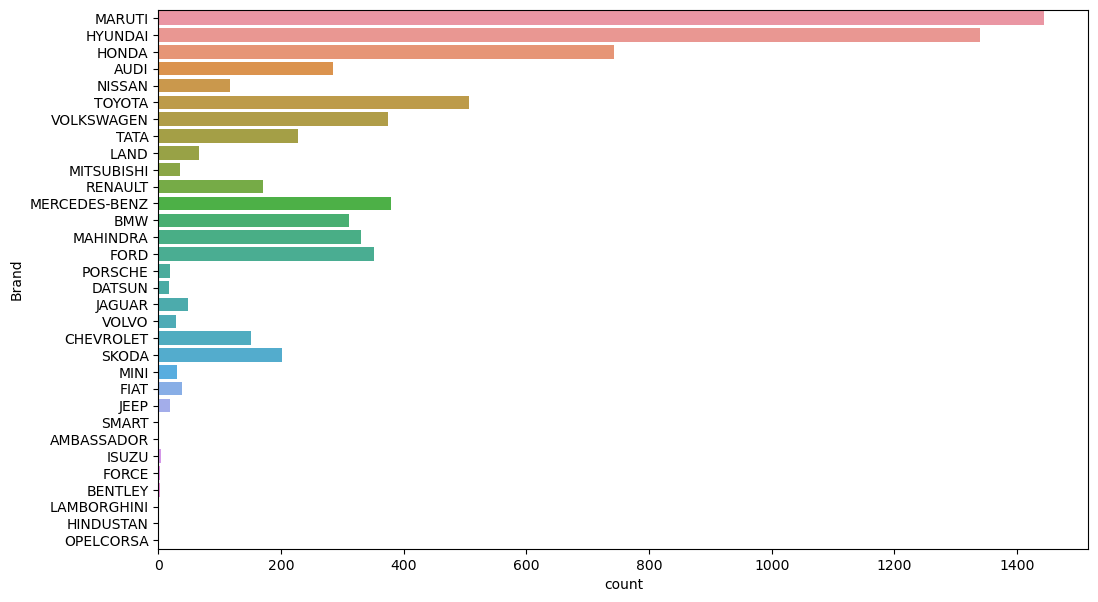

In [217]:
plt.figure(figsize=(12,7))
sns.countplot(y=(data.Brand))

<Axes: ylabel='Brand'>

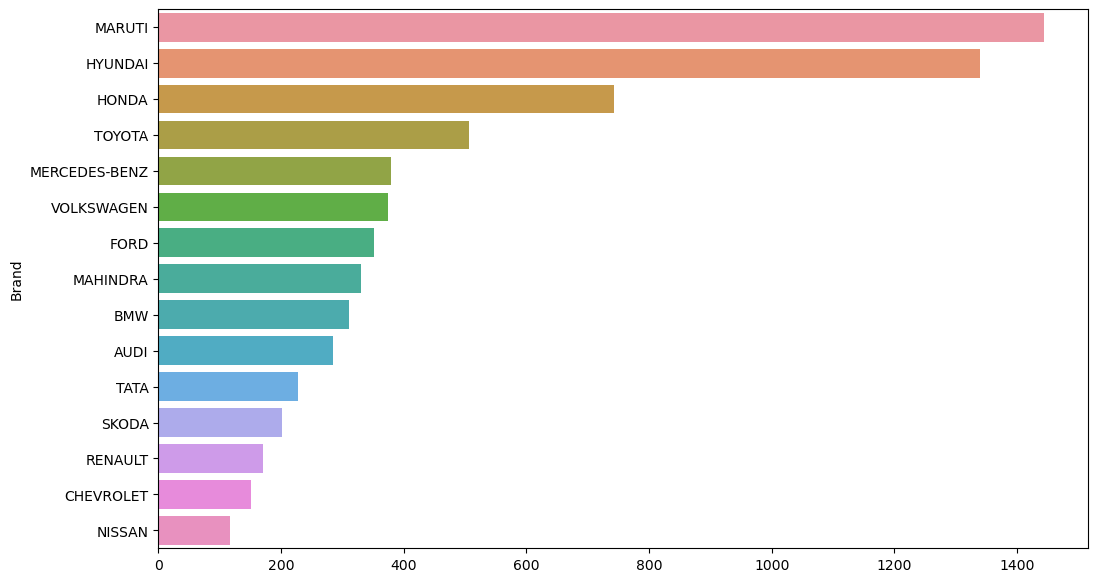

In [218]:
plt.figure(figsize=(12,7))
sns.barplot(y=data.Brand.value_counts()[data.Brand.value_counts()>90].index, x=data.Brand.value_counts()[data.Brand.value_counts()>90].values)

#### **Observations and Insights: **

**Brand Extraction:**

- Extracted Brand and Model from the Name column.
- Standardized brand names (e.g., 'Isuzu' and 'ISUZU') to ensure consistency.

**Unique Brands:**

- Identified 32 unique car brands after standardization.

**Brand Distribution:**

- Count Plot:
    - Most common brands: Maruti, Hyundai, and Honda.
    - Least common brands: Lamborghini, Bentley, Smart, Ambassador, and Hindustan.

- Bar Plot for Brands with More Than 90 Entries:
    - Leading brands: Maruti, Hyundai, Honda, Toyota, Mercedes-Benz, Volkswagen, and Ford.

**Brand Price Statistics:**

- Highest median and mean prices: LAND, LAMBORGHINI, JAGUAR.
- Other high-value brands: BMW, MERCEDES-BENZ, PORSCHE.
- Lower-end brands: AMBASSADOR, SMART, HINDUSTAN.

### **Missing value treatment**

In [219]:
# Now check the missing values of each column

print(data.isnull().sum())

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
CarAge                      0
Brand                       0
Model                       1
dtype: int64


#### **Observations and Insights: **

- Mileage: 2 missing values
- Engine: 46 missing values
- Power: 175 missing values
- Seats: 53 missing values
- New_price: 6245 missing values
- Price: 1233 missing values
- price_log: 1233 missing values (same rows as Price)
- Model: 1 missing value

**Missing values in Seats**

In [220]:
# Checking missing values in the column 'Seats'

print(data['Seats'].isnull().sum())

53


In [221]:
# Impute missing values in Seats,you can use fillna method in pandas


data['Seats'] = data.groupby(['Model','Brand'])['Seats'].transform(lambda x: x.fillna(x.median()))

In [222]:
# Now check total number of missing values of the seat column to verify if they are imputed or not

print(data['Seats'].isnull().sum())

23


In [223]:
data[data['Seats'].isnull()].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,CarAge,Brand,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,2010,MARUTI,Swift1.3
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,2006,MARUTI,Swift1.3
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,2015,MARUTI,Swift1.3
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15,10.096378,1.147402,2011,MARUTI,Swift1.3
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.70,11.112448,1.547563,2015,MARUTI,Swift1.3
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,NaN,1.75,10.915088,0.559616,2007,MARUTI,Swift1.3
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,2008,MARUTI,EstiloLXI
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,4.24,10.403839,1.444563,2014,MARUTI,Swift1.3
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,NaN,2.35,11.736069,0.854415,2006,MARUTI,Swift1.3
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,NaN,NaN,NaN,NaN,11.99,10.203592,2.484073,2013,HONDA,CR-VAT


In [224]:
# Most of the cars missing values are 5 seaters so we'll update values with 5

data.Seats=data.Seats.fillna(5)


data.Seats.isnull().sum()

0

**Missing values for Mileage**

In [225]:
# Now check missing values of each column

print(data.isnull().sum())

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6245
Price                    1233
kilometers_driven_log       0
price_log                1233
CarAge                      0
Brand                       0
Model                       1
dtype: int64


In [226]:
# Impute missing Mileage. For example, use can use median or any other methods

data['Mileage']=data['Mileage'].fillna(data['Mileage'].median())

In [227]:
# Now check total number of missing values of the seat column to verify if they are imputed or not

print(data['Mileage'].isnull().sum())

0


**Missing values for Engine**

In [228]:
print("Missing values in Engine are:",data["Engine"].isnull().sum())

Missing values in Engine are: 46


In [229]:
data['Engine'] = data.groupby(['Model','Brand'])['Engine'].transform(lambda x: x.fillna(x.median()))
print("Missing values in Engine are:",data["Engine"].isnull().sum())

Missing values in Engine are: 19


In [230]:
data['Engine']=data['Engine'].fillna(data['Engine'].median())
print(data['Engine'].isnull().sum())

0


**Missing values for Power**

In [231]:
print("Missing values in Power are:",data["Power"].isnull().sum())

Missing values in Power are: 175


In [232]:
data['Power'] = data.groupby(['Model','Brand'])['Power'].transform(lambda x: x.fillna(x.median()))

In [233]:
print("Missing values in Power are:",data["Power"].isnull().sum())

Missing values in Power are: 64


In [234]:
data['Power'] = data.Power.fillna(data.Power.median())

In [235]:
print("Missing values in Power are:",data["Power"].isnull().sum())

Missing values in Power are: 0


**Missing values for New_price**

In [236]:
print("Missing values in New_price are:",data["New_price"].isnull().sum())

Missing values in New_price are: 6245


In [237]:
data['New_price'] = data.groupby(['Model','Brand'])['New_price'].transform(lambda x: x.fillna(x.median()))
data.New_price.isnull().sum()

4577

In [238]:
# Fill missing values in 'New_price' by grouping 'Name' and 'Year'
data['New_price'] = data.groupby(['Name', 'Year'])['New_price'].apply(lambda x: x.fillna(x.median())).reset_index(level=[0,1], drop=True)

In [239]:
print("Missing values in New_price is:",data["New_price"].isnull().sum())

Missing values in New_price is: 4577


**Dropping rows with missing values in Model, price_log, and Price**

In [240]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                4577
Price                    1233
kilometers_driven_log       0
price_log                1233
CarAge                      0
Brand                       0
Model                       1
dtype: int64

In [241]:
data.dropna(subset=["Model"], inplace=True)
print(data.Model.isnull().sum())

data.dropna(subset=["price_log"], inplace=True)
print(data.price_log.isnull().sum())

data.dropna(subset=["Price"], inplace=True)
print(data.Price.isnull().sum())

0
0
0


**Checking final missing values**

In [242]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                3784
Price                       0
kilometers_driven_log       0
price_log                   0
CarAge                      0
Brand                       0
Model                       0
dtype: int64

In [243]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,CarAge
count,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,2234.000000,6018.000000,6018.000000,6018.000000,6018.000000
mean,2013.357594,57668.047690,18.135329,1620.318877,112.605982,5.277999,22.969868,9.470243,10.757961,1.824705,2013.357594
std,3.269677,37878.783175,4.581823,600.052752,53.552585,0.803837,26.967994,11.165926,0.713022,0.873606,3.269677
min,1998.000000,171.000000,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981,1998.000000
25%,2011.000000,34000.000000,15.170000,1198.000000,74.907500,5.000000,7.450000,3.500000,10.434116,1.252763,2011.000000
50%,2014.000000,53000.000000,18.160000,1493.000000,93.700000,5.000000,11.295000,5.640000,10.878047,1.729884,2014.000000
75%,2016.000000,73000.000000,21.100000,1984.000000,138.100000,5.000000,26.275000,9.950000,11.198215,2.297573,2016.000000
max,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,230.000000,160.000000,13.560618,5.075174,2019.000000


**Observations for missing values after imputing:**

**Seats:**

- Initially, there were 53 missing values in the Seats column.
- Missing values were imputed using the median value of the same Model and Brand.
- Remaining missing values were filled with 5, as it is the most common number of seats.
- Final missing values: 0.

**Mileage:**

- Initially, there were 2 missing values in the Mileage column.
- These were imputed using the median Mileage value.
- Final missing values: 0.

**Engine:**

- Initially, there were 46 missing values in the Engine column.
- Missing values were imputed using the median value of the same Model and Brand.
- Remaining missing values were filled with the overall median.
- Final missing values: 0.

**Power:**

- Initially, there were 175 missing values in the Power column.
- Missing values were imputed using the median value of the same Model and Brand.
- Remaining missing values were filled with the overall median.
- Final missing values: 0.

**New_price:**

- Initially, there were 6245 missing values in the New_price column.
- Missing values were first imputed using the median value of the same Model and Brand.
- Further imputation was done using the median value of the same Name and Year.
- Final missing values: 3784.

**Data Cleanup:**

- Rows with missing values in Model, price_log, and Price were dropped.
- Final missing values: 0 for all columns except New_price.

**Final Data Description:**

- The dataset now contains 6018 rows and 18 columns.
- Key statistics:
    - Year: Average car year is 2013.
    - Kilometers Driven: Average is 57,668 km.
    - Mileage: Average is 18.14 kmpl.
    - Engine: Average engine size is 1620 CC.
    - Power: Average power is 112.6 bhp.
    - Seats: Average number of seats is 5.28.
    - New Price: Average new car price is INR 22.97 lakhs.
    - Price: Average used car price is INR 9.47 lakhs.

## **Proposed approach**

**Data Cleaning and Preparation:**

- Handling Missing Values: Impute or remove missing values for critical columns.
- Removing Duplicates: Ensure data integrity by eliminating duplicate entries.
- Correcting Data Types: Ensure all columns have appropriate data types.
- Feature Engineering: Extract relevant information from existing columns, such as brand and model from the 'Name' column.

**Exploratory Data Analysis (EDA):**

- Distribution Analysis: Understand the distribution of key variables like price, mileage, engine size, etc.
- Correlation Analysis: Identify relationships between variables using correlation matrices.
- Visualization: Use plots to detect patterns, trends, and anomalies in the data.

**Feature Selection:**

- Correlation Matrices: Identify significant features that impact car prices.
- Feature Importance Scores: Use model-based techniques to determine feature importance.

**Model Development:**

- Regression Models: Develop models like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting.
- Regularization Techniques: Apply Lasso and Ridge regression to handle multicollinearity.
- Hyperparameter Tuning: Optimize model parameters using Grid Search and Random Search.

**Model Evaluation:**

- Evaluation Metrics: Use Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared to assess model performance.
- Cross-Validation: Ensure model robustness and avoid overfitting by using cross-validation.

### Potential Techniques to Explore

- Linear Regression: Simple and multiple linear regression to understand linear relationships.
- Decision Trees: Capture non-linear interactions between features.
- Random Forest: Ensemble technique to improve accuracy and reduce overfitting.
- Gradient Boosting: Advanced ensemble method for enhanced predictive performance.
- Regularization: Lasso and Ridge regression to improve model generalization.
- Hyperparameter Tuning: Optimize parameters for better model performance.

### Overall Solution Design

- Data Pipeline: Automated pipeline for data cleaning, preprocessing, and feature engineering.
- Model Training and Selection: Train multiple models and select the best-performing one based on evaluation metrics.
- Model Deployment: Deploy the final model as a web service or integrate it into an application for real-time predictions.
- Monitoring and Maintenance: Regularly monitor model performance and retrain with new data as needed.

### Measures of Success

- Accuracy of Predictions: High R-squared value indicating good model fit; low MSE, RMSE, and MAE values indicating accurate predictions.
- Robustness: Consistent performance across different data subsets; low variance in cross-validation scores.
- Interpretability: Clear understanding of feature importance and their impact on predictions; ability to explain model decisions to stakeholders.
- Scalability: Efficient handling of large datasets; quick response times for real-time predictions.
- User Satisfaction: Positive feedback from users regarding the accuracy and usefulness of the predictions.

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [245]:
data.to_csv("cars_data_updated.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.